https://medium.com/analytics-vidhya/skip-the-data-preprocessing-accessing-12-ready-to-go-datasets-829e53f2d78

# CIFAR10 (cats & dogs)

In [14]:
import numpy as np
import keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

mask_train = np.logical_or(y_train == 3, y_train == 5).ravel()
x_train_filtered = x_train[mask_train]
y_train_filtered = y_train[mask_train]

mask_test = np.logical_or(y_test == 3, y_test == 5).ravel()
x_test_filtered = x_test[mask_test]
y_test_filtered = y_test[mask_test]

In [19]:
x_train_flattened = x_train_filtered.reshape(x_train_filtered.shape[0], -1)
x_test_flattened = x_test_filtered.reshape(x_test_filtered.shape[0], -1)

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10*8)
clf.fit(x_train_flattened, y_train_filtered.ravel())
accuracy = clf.score(x_test_flattened, y_test_filtered.ravel())
print("Accuracy:", accuracy)


Accuracy: 0.5935


c:\users\kaami\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x_train_flattened, y_train_filtered.ravel())
accuracy = clf.score(x_test_flattened, y_test_filtered.ravel())
print("Accuracy:", accuracy)

clf = GaussianNB()
clf.fit(x_train_flattened, y_train_filtered.ravel())
accuracy = clf.score(x_test_flattened, y_test_filtered.ravel())
print("Accuracy:", accuracy)

Accuracy: 0.6
Accuracy: 0.5935


In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train_flattened, y_train_filtered.ravel())
accuracy = clf.score(x_test_flattened, y_test_filtered.ravel())
print("Accuracy:", accuracy)

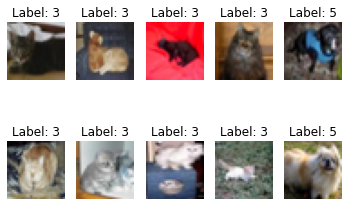

In [14]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train_filtered[i])
    plt.title(f"Label: {y_train_filtered[i][0]}")
    plt.axis('off')
plt.show()


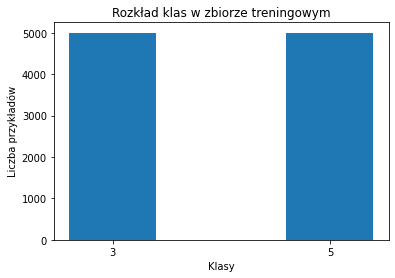

In [15]:
unique, counts = np.unique(y_train_filtered, return_counts=True)
plt.bar(unique, counts)
plt.title('Rozkład klas w zbiorze treningowym')
plt.xlabel('Klasy')
plt.ylabel('Liczba przykładów')
plt.xticks(unique)
plt.show()

In [17]:
mean = np.mean(x_train_filtered, axis=(0, 1, 2))
std = np.std(x_train_filtered, axis=(0, 1, 2))

print(f"Średnia RGB: {mean}")
print(f"Odchylenie standardowe RGB: {std}")

Średnia RGB: [126.91456641 117.43373096 106.09079756]
Odchylenie standardowe RGB: [64.68438401 63.26051609 64.64527987]


## Redukcja wymiarowości

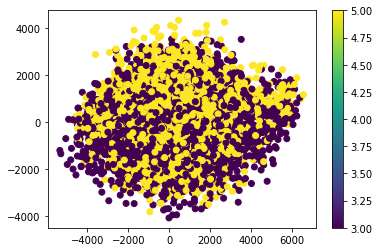

In [18]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
x_train_flat = x_train_filtered.reshape(x_train_filtered.shape[0], -1)  # Spłaszcz dane do 2D
x_train_pca = pca.fit_transform(x_train_flat)

plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train_filtered.flatten(), alpha=0.5)
plt.colorbar()
plt.show()

## Histogramy dla kanałów RGB

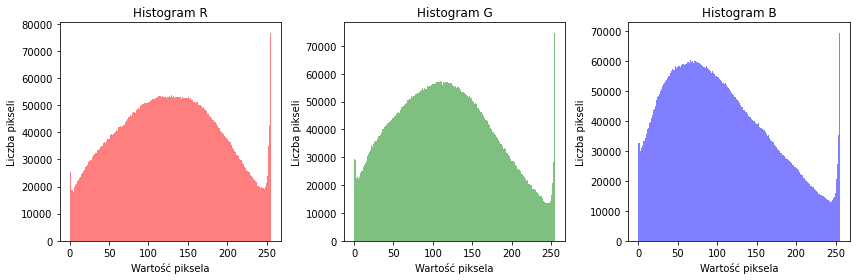

In [23]:
plt.figure(figsize=(12, 4))
for i, color in enumerate(['r', 'g', 'b']):
    plt.subplot(1, 3, i+1)
    plt.hist(x_train_filtered[:,:,:,i].ravel(), bins=256, color=color, alpha=0.5)
    plt.title(f'Histogram {color.upper()}')
    plt.xlabel('Wartość piksela')
    plt.ylabel('Liczba pikseli')
plt.tight_layout()
plt.show()


# IMDB reviews

In [5]:
from keras.datasets import imdb
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",num_words=None,skip_top=0, maxlen=None,seed=1,start_char=1,oov_char=2,index_from=3)

'''
num_words=None: Określa maksymalną liczbę słów, które mają zostać uwzględnione na podstawie częstości występowania słowa. Jeśli jest ustawione na None, zostaną załadowane wszystkie słowa.

skip_top=0: Ignoruje określoną liczbę najczęściej występujących słów. Dla skip_top=0 nie ignoruje żadnych słów.

maxlen=None: Maksymalna długość recenzji do załadowania. Recenzje przekraczające tę długość zostaną przycięte. Jeśli jest None, załaduje recenzje o dowolnej długości.

seed=1: Wartość nasionka używana do mieszania danych.

start_char=1: Wartość charakterystyczna, która oznacza początek sekwencji w recenzji.

oov_char=2: Wartość charakterystyczna używana dla słów, które nie zostały uwzględnione z powodu ograniczenia num_words lub skip_top.

index_from=3: Indeks, od którego zaczynają się rzeczywiste słowa w słowniku. Oznacza to, że pierwsze trzy indeksy w słowniku są zarezerwowane dla start_char, oov_char oraz nieokreślonego znaku końca sekwencji.
'''


# Odwróć indeks słownika IMDB, aby uzyskać mapowanie z indeksu na słowo
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Dekoduj recenzje do tekstów
decoded_train = [" ".join([reverse_word_index.get(i - 3, "?") for i in review]) for review in x_train] #Dlaczego i - 3? - trzy pierwsze indeksy są zarezerwowane dla wartości specjalnych: start sekwencji, nieznane słowo i koniec sekwencji, więc indeksy rzeczywistych słów w słowniku są przesunięte o 3.
decoded_test = [" ".join([reverse_word_index.get(i - 3, "?") for i in review]) for review in x_test]

# Wektoryzacja za pomocą BoW
# vectorizer = CountVectorizer(max_features=5000)  # Limit do 5000 najczęstszych słów
# x_train_vec = vectorizer.fit_transform(decoded_train)
# x_test_vec = vectorizer.transform(decoded_test)

# Wektoryzacja za pomocą TF-IDF
vectorizer = TfidfVectorizer(max_features=2500)
# x_train_vec = vectorizer.fit_transform([" ".join([str(i) for i in review]) for review in x_train])
# x_test_vec = vectorizer.transform([" ".join([str(i) for i in review]) for review in x_test])
x_train_vec = vectorizer.fit_transform(decoded_train)
x_test_vec = vectorizer.transform(decoded_test)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train_vec, y_train)

accuracy = clf.score(x_test_vec, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.83768


In [9]:
decoded_train

["? i have copy of this on vhs i think they the television networks should play this every year for the next twenty years so that we don't forget what was and that we remember not to do the same mistakes again like putting some people in the director's chair where they don't belong this movie rappin' is like a vaudevillian musical for those who can't sing or act this movie is as much fun as trying to teach the 'blind' to drive a city bus br br john hood peebles has just got out of prison and he's headed back to the old neighborhood in serving time for an all to nice crime of necessity of course john heads back onto the old street and is greeted by kids dogs old ladies and his peer homeys as they dance and sing all along the way br br i would recommend this if i was sentimental or if in truth someone was smoking medicinal pot prescribed by a doctor for glaucoma either way this is a poorly directed scripted acted and even produced i never thought i'd sat that satire of ghetto life with t

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x_train_vec, y_train)
accuracy = clf.score(x_test_vec, y_test)
print("Accuracy:", accuracy)

clf = LogisticRegression()
clf.fit(x_train_vec, y_train)
accuracy = clf.score(x_test_vec, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.68852
Accuracy: 0.8794


In [25]:
from keras.datasets import imdb
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",num_words=None,skip_top=0, maxlen=None,seed=1,start_char=1,oov_char=2,index_from=3)
x_train

array([list([1, 13, 28, 1039, 7, 14, 23, 1856, 13, 104, 36, 4, 699, 8060, 144, 297, 14, 175, 291, 18, 4, 375, 1784, 153, 38, 15, 75, 92, 859, 51, 16, 5, 15, 75, 377, 24, 8, 81, 4, 172, 2497, 174, 40, 1489, 49, 84, 11, 4, 2030, 3039, 121, 36, 92, 4881, 14, 20, 36736, 9, 40, 6, 23003, 621, 18, 148, 37, 191, 1941, 42, 511, 14, 20, 9, 17, 76, 253, 17, 269, 8, 3336, 4, 45915, 8, 1278, 6, 543, 2647, 10, 10, 308, 3102, 30038, 47, 43, 188, 46, 7, 1172, 5, 240, 2854, 145, 8, 4, 154, 3243, 11, 4819, 58, 18, 35, 32, 8, 327, 823, 7, 7350, 7, 265, 308, 1828, 145, 1646, 4, 154, 890, 5, 9, 14412, 34, 362, 2515, 154, 1914, 5, 27, 15227, 36693, 17, 36, 837, 5, 1941, 32, 367, 4, 96, 10, 10, 13, 62, 386, 14, 48, 13, 16, 3178, 42, 48, 11, 882, 294, 16, 3412, 42111, 4360, 36443, 34, 6, 1042, 18, 74401, 345, 96, 14, 9, 6, 862, 526, 3757, 917, 5, 60, 1055, 13, 115, 197, 474, 1829, 15, 2006, 7, 6791, 113, 19, 4, 46360, 261, 13, 104, 4, 1653, 173, 7, 4, 65, 143, 4, 3801, 1366, 548, 844, 5, 4, 837, 1396, 27, 36

In [26]:
decoded_train[5]

'? on the day of the california presidential primary between midnight and 1 00 am the spy victor rovner sends a message from kuala lumpur to usa meanwhile in los angeles the federal agent jack bauer has returned to his family and is having trouble at home with his teenage daughter kimberly who blames her mother teri for putting jack out of the house teri and jack decide to have a serious conversation with kim and they discover that the girl has run away home while trying to solve his domestic problem jack is called to his counter terrorist unit by his colleague nina myers for a meeting with their chief richard walsh who discloses a menace against the life of senator david palmer who is running for president and they need to find the shooter later walsh has a private conversation with jack and tells that there is a conspiracy in the agency against david palmer and assigns jack to find the conspirators when an airplane explodes over the mojave desert jack has one additional issue to worr

## Analiza rozkładu długości recenzji

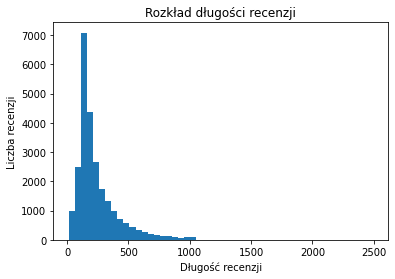

In [27]:
review_lengths = [len(review) for review in x_train]
plt.hist(review_lengths, bins=50)
plt.title('Rozkład długości recenzji')
plt.xlabel('Długość recenzji')
plt.ylabel('Liczba recenzji')
plt.show()

In [31]:
min(review_lengths), max(review_lengths), np.mean(review_lengths)

(11, 2494, 238.71364)

## Rozkład klas

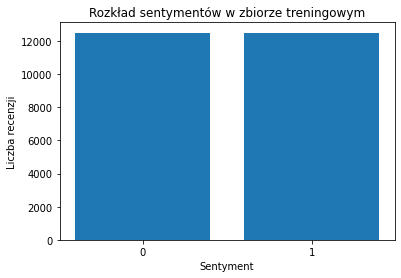

In [32]:
plt.hist(y_train, bins=np.arange(-0.5, 2, 1), rwidth=0.8)
plt.title('Rozkład sentymentów w zbiorze treningowym')
plt.xticks([0, 1])
plt.xlabel('Sentyment')
plt.ylabel('Liczba recenzji')
plt.show()

## Najczęściej występujące słowa

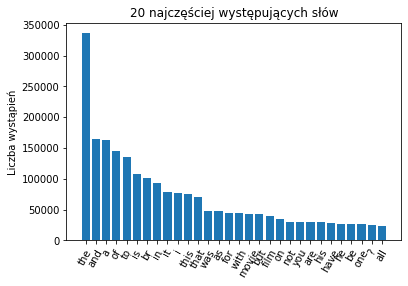

In [38]:
from collections import Counter

# Licznik wszystkich słów
word_count = Counter(" ".join(decoded_train).split())

# Najczęściej występujące słowa
most_common_words = word_count.most_common(30)
words, counts = zip(*most_common_words)
plt.bar(words, counts)
plt.title('20 najczęściej występujących słów')
plt.xticks(rotation=60)
plt.ylabel('Liczba wystąpień')
plt.show()

## TF-IDF statystyki

In [50]:
# Znajdź najwyższe wartości TF-IDF
max_value = x_train_vec.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

# Zdobądź nazwy cech, czyli słowa
feature_names = np.array(vectorizer.get_feature_names())

# Pokaż słowa z najniższym i najwyższym TF-IDF
print("Słowa z najniższym TF-IDF:")
print(feature_names[sorted_by_tfidf[:20]])

print("\nSłowa z najwyższym TF-IDF:")
print(feature_names[sorted_by_tfidf[-20:]])


Słowa z najniższym TF-IDF:
['practice' 'namely' 'receives' 'proceedings' 'secretly' 'visits' 'hoped'
 'aforementioned' 'purposes' 'rooms' 'likewise' 'process' 'backgrounds'
 'presumably' 'closest' 'screams' 'crucial' 'pushed' 'prevent' 'arrive']

Słowa z najwyższym TF-IDF:
['biko' 'zizek' 'davies' 'pack' 'elvira' 'che' 'modesty' 'master' 'foul'
 'seagal' 'gadget' 'kyle' 'timon' 'othello' 'blah' 'episode' 'br' 'steve'
 'demons' 'pokemon']


c:\users\kaami\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Eksploracja najbardziej wpływowych słów w klasyfikacji

In [51]:
rf = RandomForestClassifier()
rf.fit(x_train_vec, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("10 najważniejszych cech:")
for f in range(10):
    print(f"{f + 1}. cecha {feature_names[indices[f]]} ({importances[indices[f]]})")


10 najważniejszych cech:
1. cecha bad (0.021172206972016876)
2. cecha worst (0.015035356848201809)
3. cecha great (0.011054147731982957)
4. cecha waste (0.00863527927307341)
5. cecha no (0.00834431937900495)
6. cecha awful (0.007111487619089685)
7. cecha and (0.006624476737986929)
8. cecha boring (0.006286084221761023)
9. cecha excellent (0.006075881960653731)
10. cecha terrible (0.005512389043180843)


## Analiza bigramów i trigramów

In [52]:
# Bigramy i trigramy
bigram_vectorizer = TfidfVectorizer(ngram_range=(2, 2), max_features=5000)
trigram_vectorizer = TfidfVectorizer(ngram_range=(3, 3), max_features=5000)

x_train_bigrams = bigram_vectorizer.fit_transform(decoded_train)
x_train_trigrams = trigram_vectorizer.fit_transform(decoded_train)

print("Bigramy:")
print(bigram_vectorizer.get_feature_names()[:10])

# Wyświetlenie kilku trigramów
print("\nTrigramy:")
print(trigram_vectorizer.get_feature_names()[:10])

Kilka bigramów:
['10 10', '10 br', '10 minutes', '10 out', '10 years', '15 minutes', '20 minutes', '20 years', '20th century', '30 minutes']

Kilka trigramów:
['10 br br', '10 out of', '10 year old', '12 year old', '14 year old', '40 year old', '90 minutes of', 'able to get', 'able to see', 'about an hour']


c:\users\kaami\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Histogramy Sentymentu dla Najczęstszych Słów

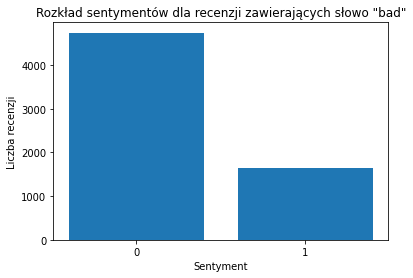

In [55]:
# Przykład dla jednego słowa
target_word = 'bad'
indices = [i for i, review in enumerate(decoded_train) if target_word in review]
target_sentiments = [y_train[i] for i in indices]

plt.hist(target_sentiments, bins=np.arange(-0.5, 2, 1), rwidth=0.8)
plt.title(f'Rozkład sentymentów dla recenzji zawierających słowo "{target_word}"')
plt.xticks([0, 1])
plt.xlabel('Sentyment')
plt.ylabel('Liczba recenzji')
plt.show()

## Wykresy Pudełkowe Długości Recenzji

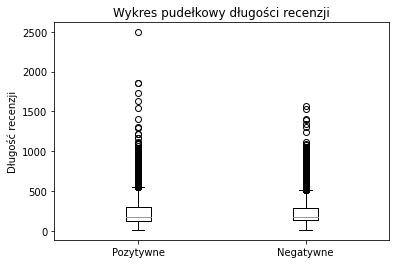

In [56]:
positive_lengths = [len(review) for i, review in enumerate(x_train) if y_train[i] == 1]
negative_lengths = [len(review) for i, review in enumerate(x_train) if y_train[i] == 0]

plt.boxplot([positive_lengths, negative_lengths], labels=['Pozytywne', 'Negatywne'])
plt.title('Wykres pudełkowy długości recenzji')
plt.ylabel('Długość recenzji')
plt.show()

## Wizualizacja PCA

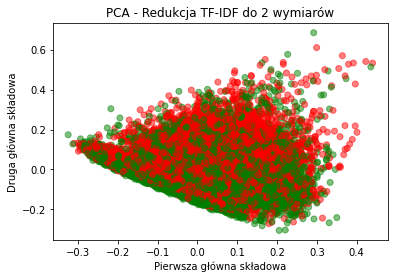

In [58]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_vec.toarray())

colors = ['red' if label == 0 else 'green' for label in y_train]

plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=colors, alpha=0.5)
plt.title('PCA - Redukcja TF-IDF do 2 wymiarów')
plt.xlabel('Pierwsza główna składowa')
plt.ylabel('Druga główna składowa')
plt.show()


# Wisconsin Breast Cancer Diagnostic Dataset

In [59]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = datasets.load_breast_cancer()
'''
data.data: Macierz, w której każdy wiersz reprezentuje próbkę, a każda kolumna reprezentuje cechę. W tym zestawie danych jest 569 próbek i 30 cech.

data.target: Lista etykiet dla każdej próbki. Wartość 0 oznacza złośliwy guz, a wartość 1 oznacza łagodny guz.

data.feature_names: Lista nazw cech.

data.target_names: Lista nazw klas. W tym przypadku to ['malignant' (złośliwy), 'benign' (łagodny)].

data.DESCR: Pełny opis zestawu danych.
'''

X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9707602339181286


In [30]:
len(data.target)

569

In [60]:
print(data.feature_names)
print(data.DESCR)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
    

In [62]:
import pandas as pd

df = pd.DataFrame(X, columns=data.feature_names)
desc = df.describe()
desc

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Wizualizacja Cech

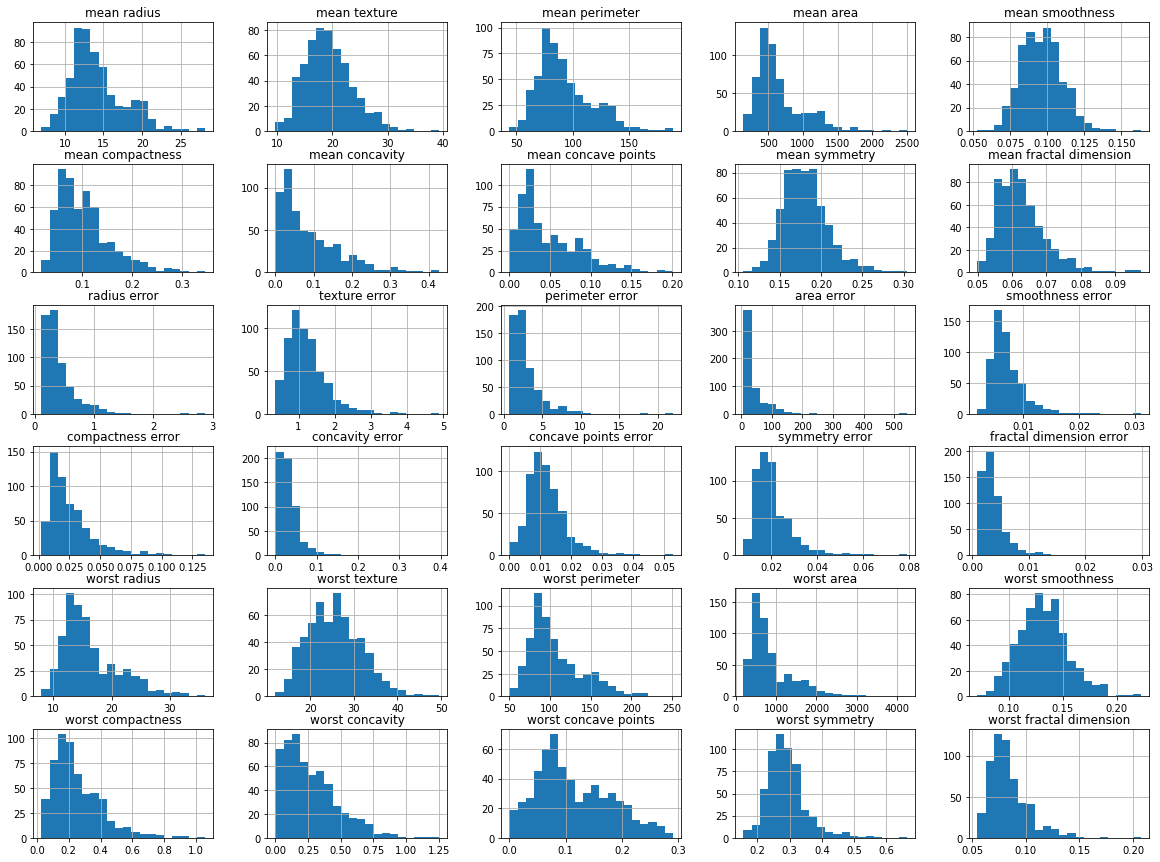

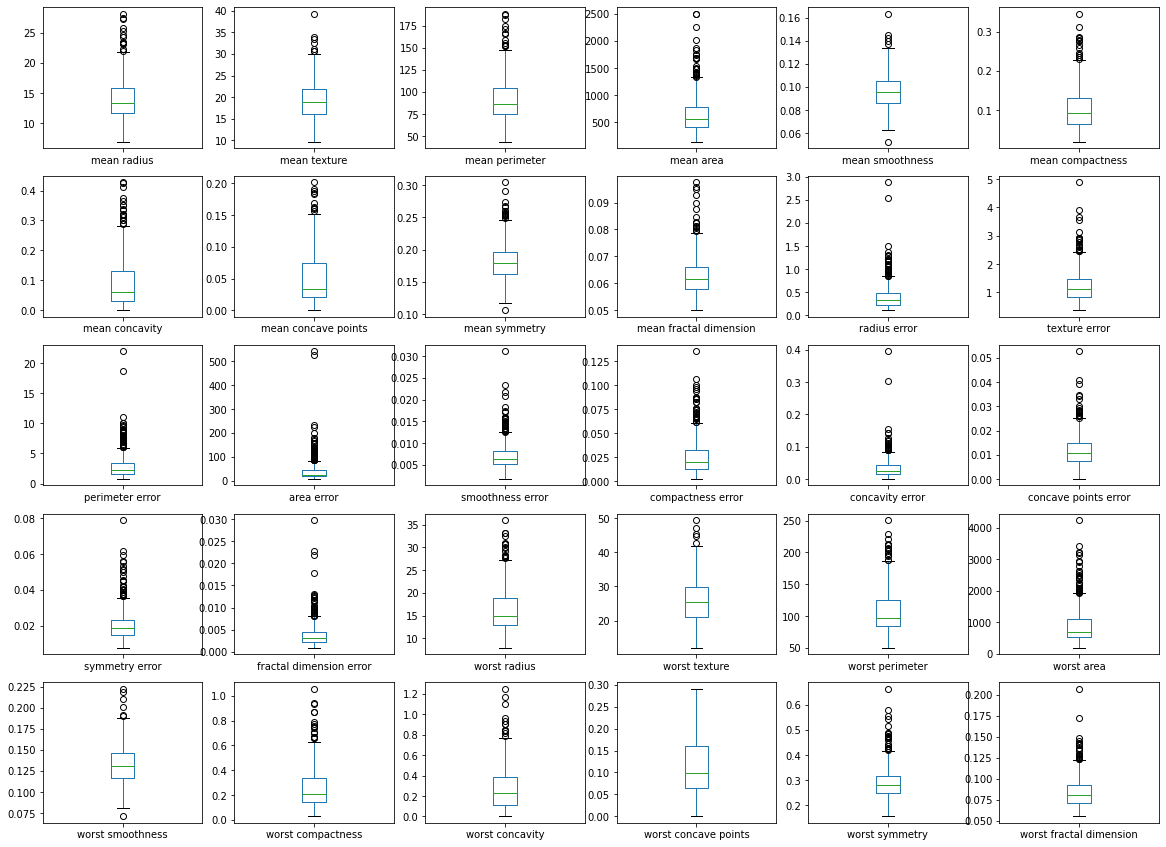

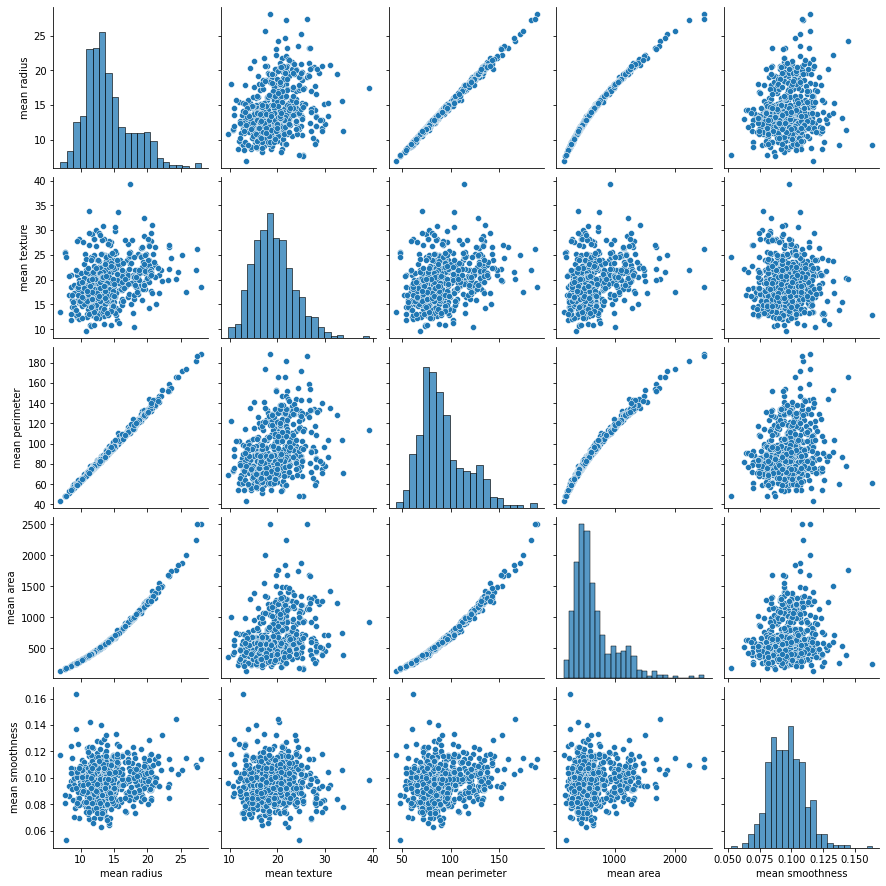

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogramy
df.hist(bins=20, figsize=(20, 15))
plt.show()

# Wykresy pudełkowe
df.plot(kind='box', subplots=True, layout=(5,6), sharex=False, sharey=False, figsize=(20, 15))
plt.show()

# Macierz rozproszenia
sns.pairplot(df.iloc[:, :5])  # Przykładowe dla pierwszych 5 cech
plt.show()

## Analiza Korelacji

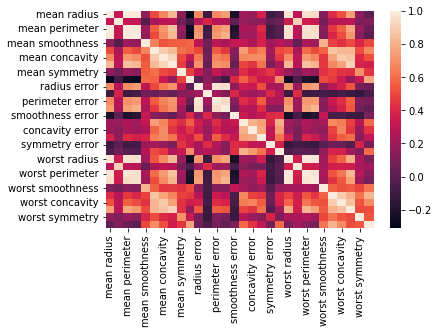

In [64]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.show()

## Wizualizacja PCA

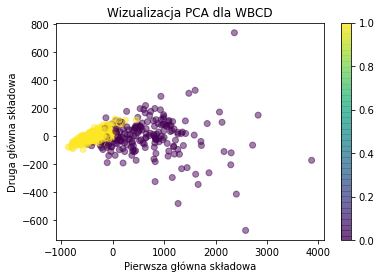

In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.5, cmap='viridis')
plt.xlabel('Pierwsza główna składowa')
plt.ylabel('Druga główna składowa')
plt.title('Wizualizacja PCA dla WBCD')
plt.colorbar()
plt.show()

## Analiza Różnic Między Klasami

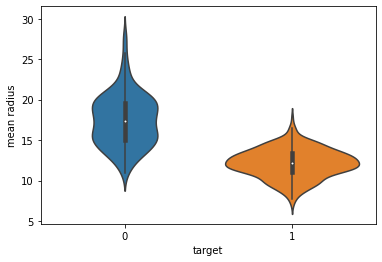

In [67]:
df['target'] = y

sns.violinplot(x='target', y='mean radius', data=df)
plt.show()

In [68]:
class_comparison = df.groupby('target').mean()
class_comparison

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


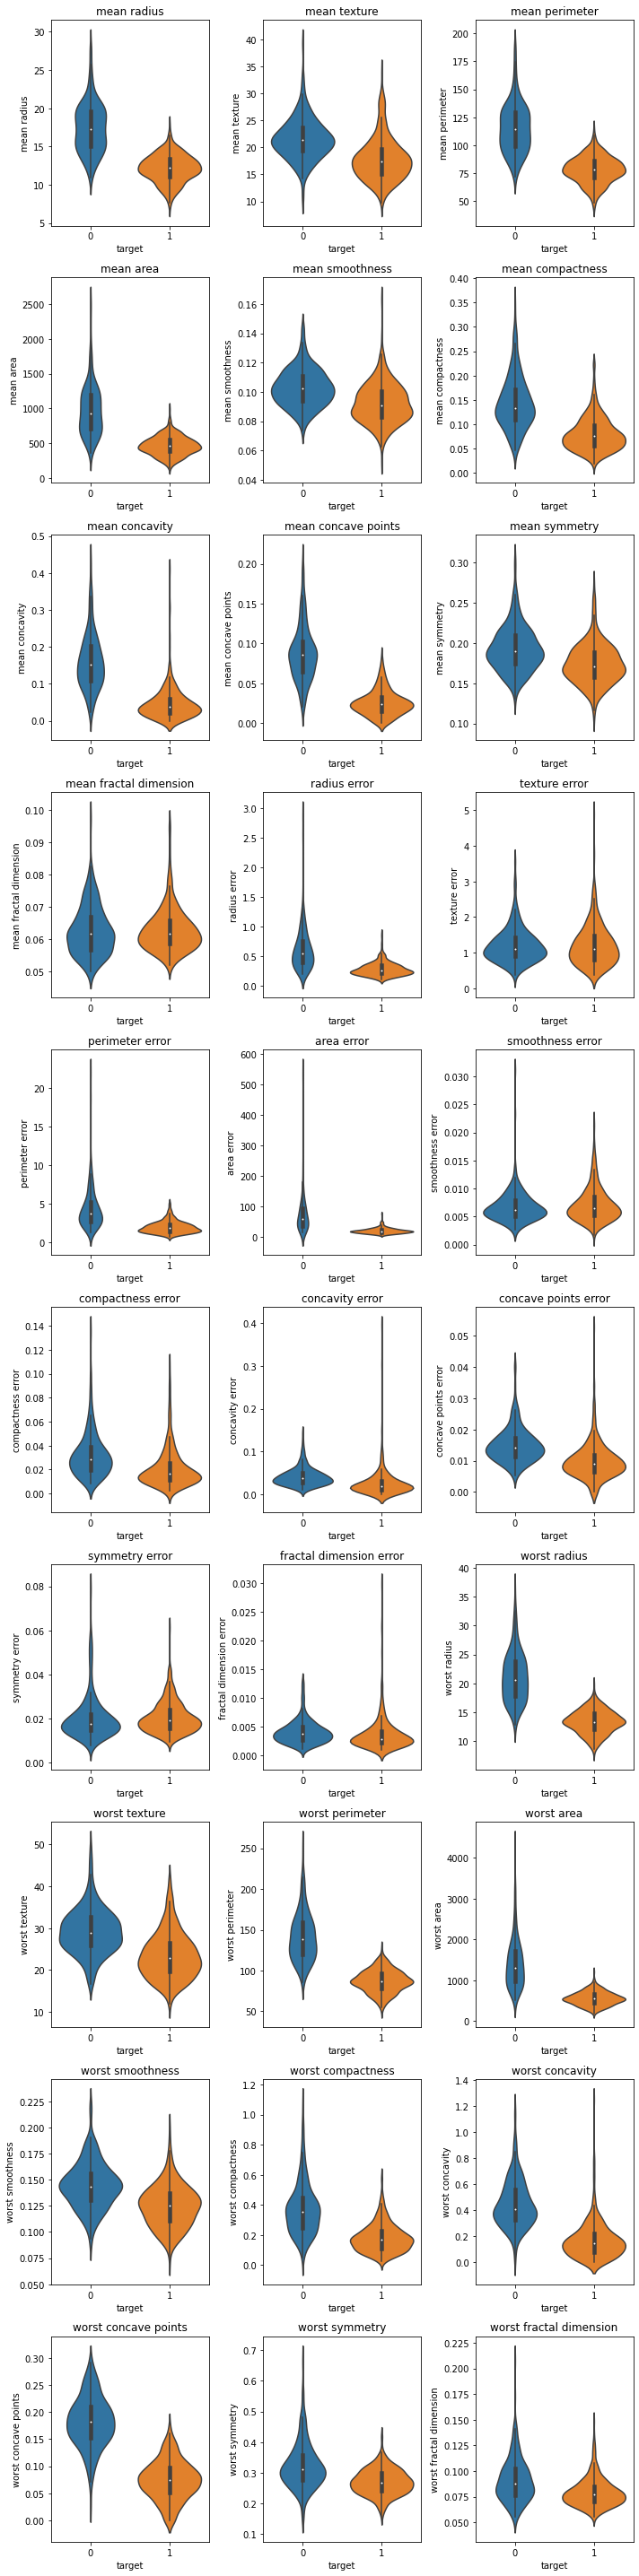

In [69]:
plt.figure(figsize=(10, 40))

for i, feature in enumerate(df.columns[:-1]):  # pomijamy ostatnią kolumnę, która jest 'target'
    plt.subplot(10, 3, i+1)
    sns.violinplot(x='target', y=feature, data=df)
    plt.title(feature)

plt.tight_layout()
plt.show()